Saving parrot.jpg to parrot.jpg


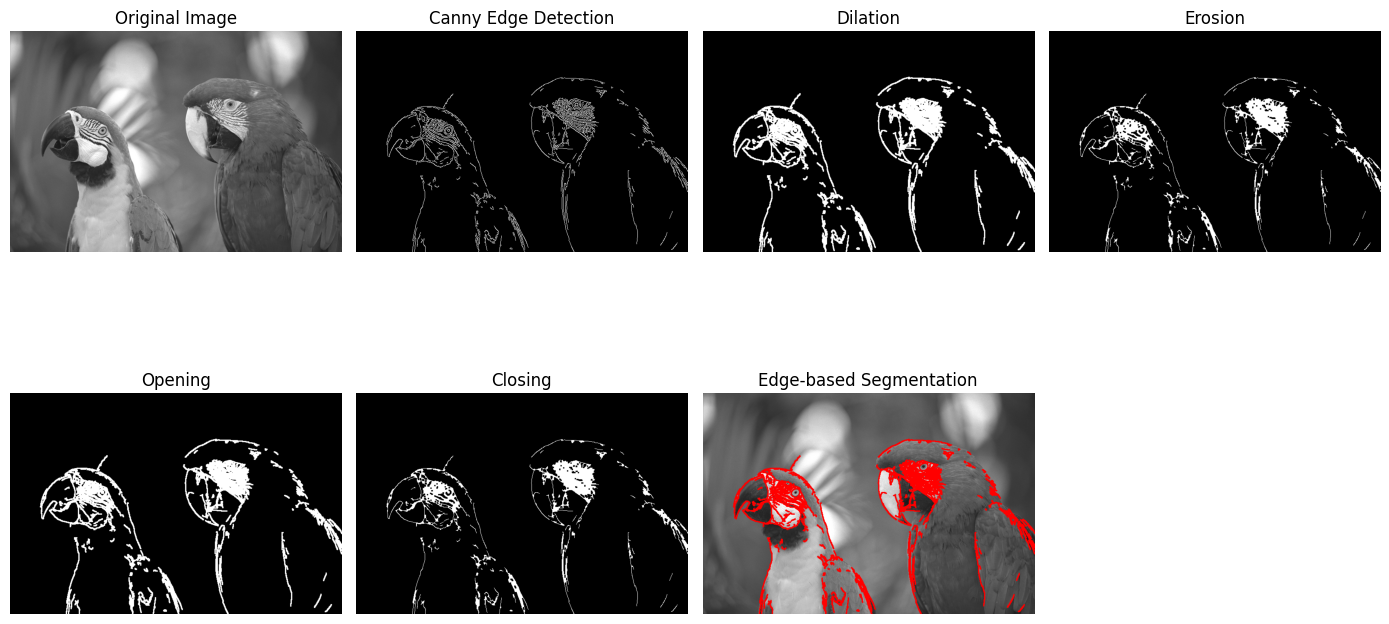

In [1]:
# PROGRAM: Edge Detection & Morphology
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]

img_gray = cv2.imread(image_path, 0)
img_color = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

if img_gray is None:
    raise ValueError("Failed to load image")

edges = cv2.Canny(img_gray, 100, 200)
kernel = np.ones((3, 3), np.uint8)

dilated = cv2.dilate(edges, kernel, iterations=1)

eroded = cv2.erode(dilated, kernel, iterations=1)

opening = cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel)

closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(
    edges,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

segmented = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
cv2.drawContours(segmented, contours, -1, (255, 0, 0), 2)


plt.figure(figsize=(14, 8))

plt.subplot(2, 4, 1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(2, 4, 2)
plt.title("Canny Edge Detection")
plt.imshow(edges, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 3)
plt.title("Dilation")
plt.imshow(dilated, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 4)
plt.title("Erosion")
plt.imshow(eroded, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.title("Opening")
plt.imshow(opening, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.title("Closing")
plt.imshow(closing, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.title("Edge-based Segmentation")
plt.imshow(segmented)
plt.axis("off")

plt.tight_layout()
plt.show()